# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sebastian Luth Hasibuan
- **Email:** sebastianluthhasibuan@students.polmed.ac.id
- **ID Dicoding:** sebastian_luth_PqEN

## Menentukan Pertanyaan Bisnis

1. Bagaimana peran cuaca dalam mempengaruhi jumlah peminjaman sepeda 
2. Bagaimana pola penggunaan sepeda berdasarkan musim?
3. Bagaimana tren penggunaan sepeda dalam 12 bulan berdasarkan casual dan registered user dan mana yang lebih banyak melakukan penyewaan
4. Bagaimana kondisi penggunaan sepeda pada hari libur dibandingkan dengan holiday, hari kerja dan akhir pekan?
5. Bagaimana tren penggunaan sepeda dalam setahun dari tahun 2011 - 2012
6. Bagaimana variabel seperti temp dan atemp dapat mempengaruhi jumlah total penggunaan sepeda ?
7. Apa saja faktor-faktor yang paling mempengaruhi jumlah total peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.ticker import FuncFormatter

## Data Wrangling

### Gathering Data
Gathering data merupakan tahap dimana mengumpulkan data. Karena dalam final project kali ini saya mengambil Bike Sharing Dataset maka adan mengimpor file day.csv dan hour.csv dan memuatnya

#### Load Data Day

In [151]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### Load Data Hour

In [152]:
hr_df = pd.read_csv("./data/hour.csv")
hr_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

### Assessing Data

#### Menilay Data day_df

##### 1. Pengecekan tipe data day_df

In [153]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### 2. Pengecekan Missing Value

In [154]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### 3. Pengecekan Duplikasi Data

In [155]:
print("jumlah duplikasi",day_df.duplicated())

jumlah duplikasi 0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool


##### 4. Ringkasan Parameter Statistik

In [156]:
day_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

#### Meilai Data hr_df

##### 1. Pengecekan tipe data hr_df

In [157]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### 2. Pengecekan missing value hr_df

In [158]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### 3. Pengecekan duplikasi data value hr_df

In [159]:
print("jumlah data duplikasi : ", hr_df.duplicated())

jumlah data duplikasi :  0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool


##### 4. Ringkasan Parameter Statistik hr_df

In [160]:
hr_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

### Cleaning Data

#### Menghapus table yang tidak digunakan
Sebelum kita masuk ke tahapan-tahapan selanjutnya, kita sekarang akan menghapus terlebih dahulu tabel hr. Alasannya adalah karena tabel ini tidak relevan dengan pertanyaan-pertanyaan kita diatas.

In [161]:
del hr_df

#### Menghapus beberapa kolom yang tidak diperlukan
Berdasarkan pertanyaan bisnis yang sudah ada, maka untuk kolom yang akan didrop, yakni:

instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.
windspeed: Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda.

In [162]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1        0        6           0           2   
1  2011-01-02       1   0     1        0        0           0           2   
2  2011-01-03       1   0     1        0        1           1           1   
3  2011-01-04       1   0     1        0        2           1           1   
4  2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  casual  registered   cnt  
0  0.344167  0.363625  0.805833     331         654   985  
1  0.363478  0.353739  0.696087     131         670   801  
2  0.196364  0.189405  0.437273     120        1229  1349  
3  0.200000  0.212122  0.590435     108        1454  1562  
4  0.226957  0.229270  0.436957      82        1518  1600

#### Mengubah beberapa detail column
karna beberapa nama coloumn susah di pahami sehingga saya mengganti nya untuk mempermudah dalam mengexploratori data nantinya 

In [163]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

dateday  season  year  month  holiday  weekday  workingday  \
0  2011-01-01       1     0      1        0        6           0   
1  2011-01-02       1     0      1        0        0           0   
2  2011-01-03       1     0      1        0        1           1   
3  2011-01-04       1     0      1        0        2           1   
4  2011-01-05       1     0      1        0        3           1   

   weather_cond      temp     atemp       hum  casual  registered  count  
0             2  0.344167  0.363625  0.805833     331         654    985  
1             2  0.363478  0.353739  0.696087     131         670    801  
2             1  0.196364  0.189405  0.437273     120        1229   1349  
3             1  0.200000  0.212122  0.590435     108        1454   1562  
4             1  0.226957  0.229270  0.436957      82        1518   1600

In [164]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

# Menampilkan data yang telah diubah
print(day_df)

        dateday  season  year month  holiday weekday  workingday  \
0    2011-01-01  Spring     0   Jan        0     Sat           0   
1    2011-01-02  Spring     0   Jan        0     Sun           0   
2    2011-01-03  Spring     0   Jan        0     Mon           1   
3    2011-01-04  Spring     0   Jan        0     Tue           1   
4    2011-01-05  Spring     0   Jan        0     Wed           1   
..          ...     ...   ...   ...      ...     ...         ...   
726  2012-12-27  Spring     1   Dec        0     Thu           1   
727  2012-12-28  Spring     1   Dec        0     Fri           1   
728  2012-12-29  Spring     1   Dec        0     Sat           0   
729  2012-12-30  Spring     1   Dec        0     Sun           0   
730  2012-12-31  Spring     1   Dec        0     Mon           1   

            weather_cond      temp     atemp       hum  casual  registered  \
0           Misty/Cloudy  0.344167  0.363625  0.805833     331         654   
1           Misty/Cloudy  0

In [165]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

dateday  season year month holiday weekday workingday  \
0 2011-01-01  Spring    0   Jan       0     Sat          0   
1 2011-01-02  Spring    0   Jan       0     Sun          0   
2 2011-01-03  Spring    0   Jan       0     Mon          1   
3 2011-01-04  Spring    0   Jan       0     Tue          1   
4 2011-01-05  Spring    0   Jan       0     Wed          1   

          weather_cond      temp     atemp       hum  casual  registered  \
0         Misty/Cloudy  0.344167  0.363625  0.805833     331         654   
1         Misty/Cloudy  0.363478  0.353739  0.696087     131         670   
2  Clear/Partly Cloudy  0.196364  0.189405  0.437273     120        1229   
3  Clear/Partly Cloudy  0.200000  0.212122  0.590435     108        1454   
4  Clear/Partly Cloudy  0.226957  0.229270  0.436957      82        1518   

   count  
0    985  
1    801  
2   1349  
3   1562  
4   1600

In [166]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## Exploratory Data Analysis (EDA)

### Explore Data day_df

####  Mengelompokkan penyewa berdasarkan hari baik casual dan registered pengguna

In [167]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah penyewaan sepeda
day_df.groupby(by='dateday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})


count                    
             max   min    mean   sum
dateday                             
2011-01-01   985   985   985.0   985
2011-01-02   801   801   801.0   801
2011-01-03  1349  1349  1349.0  1349
2011-01-04  1562  1562  1562.0  1562
2011-01-05  1600  1600  1600.0  1600
...          ...   ...     ...   ...
2012-12-27  2114  2114  2114.0  2114
2012-12-28  3095  3095  3095.0  3095
2012-12-29  1341  1341  1341.0  1341
2012-12-30  1796  1796  1796.0  1796
2012-12-31  2729  2729  2729.0  2729

[731 rows x 4 columns]

In [168]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah penyewaan sepeda
grouped_df = day_df.groupby(by='dateday').agg({
    'count': 'sum'
})

# Mengurutkan berdasarkan jumlah penyewaan sepeda dan mengambil 5 data teratas
top_10_df = grouped_df.sort_values(by='count', ascending=False).head(10)

print(top_10_df)

            count
dateday          
2012-09-15   8714
2012-09-29   8555
2012-09-22   8395
2012-03-23   8362
2012-05-19   8294
2012-09-09   8227
2012-07-25   8173
2012-09-21   8167
2012-10-05   8156
2012-06-02   8120


#### Mengelompokkan pengguna sepeda berdasarkan Bulan baik casual dan registered pengguna

In [169]:
day_df.groupby(by='month', observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

#### Mengelompokkan pengguna sepeda berdasarkan Musim baik casual dan registered pengguna

In [170]:
day_df.groupby(by='season', observed=True).agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean','sum'],
    'count': ['max', 'min', 'mean', 'sum']
})

casual           registered         count                     \
               mean     sum         mean     sum   max   min         mean   
season                                                                      
Fall    1202.611702  226091  4441.691489  835038  8714  1115  5644.303191   
Spring   334.928177   60622  2269.204420  410726  7836   431  2604.132597   
Summer  1106.097826  203522  3886.233696  715067  8362   795  4992.331522   
Winter   729.112360  129782  3999.050562  711831  8555    22  4728.162921   

                 
            sum  
season           
Fall    1061129  
Spring   471348  
Summer   918589  
Winter   841613

#### Mengelompokkan pengguna sepeda berdasarkan cuaca baik casual dan registered pengguna

In [171]:
day_df.groupby(by='weather_cond', observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

#### Mengelompokkan pengguna sepeda berdasarkan holiday baik casual dan registered pengguna

In [172]:
day_df.groupby(by='holiday', observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

#### Mengelompokkan pengguna sepeda berdasarkan hari kerja (weekday) vs akhir pekan (weekend) baik itu casual dan registered pengguna

In [173]:
day_df.groupby(by='weekday', observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

#### Mengelompokkan pengguna sepeda berdasarkan workingday baik itu casual dan tegistered penggunga

In [174]:
day_df.groupby(by='workingday',observed=True).agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

#### Mengelompokkan pengguna sepeda berdasarkan temp atau suhu berdasarkan seasond atau musim baik casual dan registered

In [175]:
day_df.groupby(by='season',observed=True).agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
})

temp                         atemp                    
             max       min      mean       max       min      mean
season                                                            
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539

##### Hubungan antara penyewa casual, registered, dan count

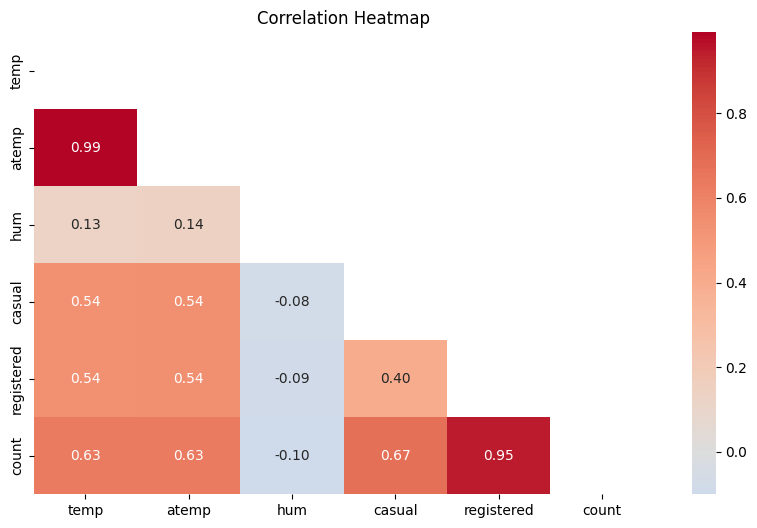

In [176]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaiamana peran cuaca dalam mempengaruhi jumlah peminjaman sepeda 

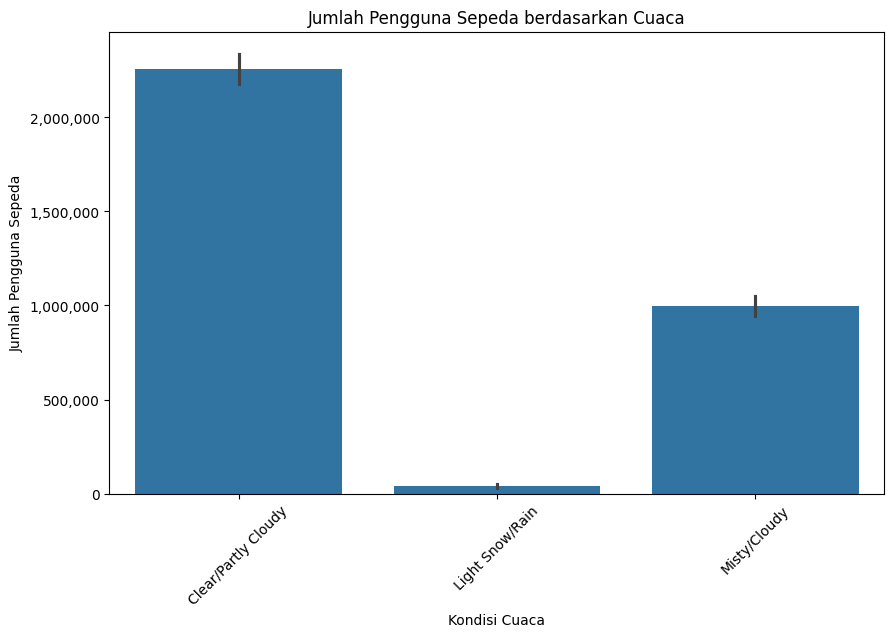

In [177]:
# Fungsi untuk format y-axis dengan ribuan separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Membuat plot bar
plt.figure(figsize=(10, 6))
sns.barplot(
    x='weather_cond',
    y='count',
    estimator=sum, 
    data=day_df,
)

plt.title('Jumlah Pengguna Sepeda berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')

# Mengatur format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xticks(rotation=45)  # Memutar label x untuk keterbacaan yang lebih baik

plt.show()

### Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan musim?

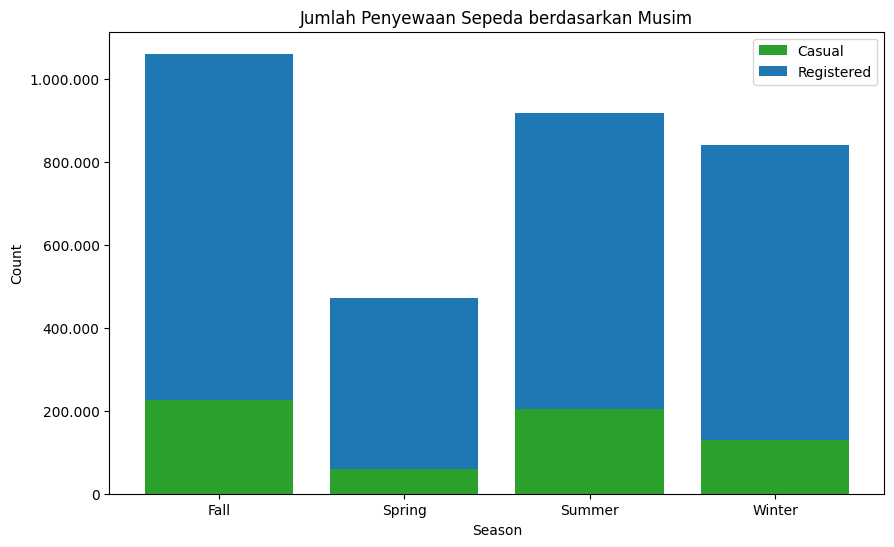

In [178]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season', observed=True)[['registered', 'casual']].sum().reset_index()

# Fungsi untuk format y-axis dengan ribuan separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')

plt.figure(figsize=(10, 6))

# Membuat barplot dengan stacked bar
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:green'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    bottom=seasonal_usage['casual'],
    label='Registered',
    color='tab:blue'
)

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim')
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()

### Pertanyaan 3 : Bagaimana tren penggunaan sepeda dalam 12 bulan berdasarkan casual dan registered user dan mana yang lebih banyak melakukan penyewaan

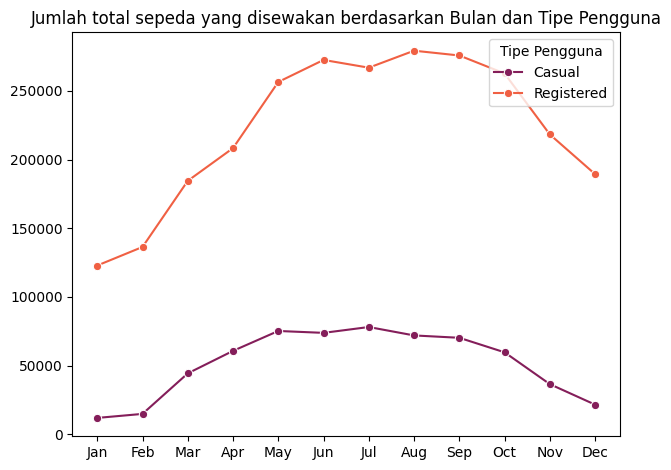

In [179]:
# Memaastikan kolom 'bulan' adalah tipe kategorikal dengan urutan yang benar
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

# Gabungkan data berdasarkan bulan dan jenis pengguna
monthly_counts_casual = day_df.groupby(by=["month"], observed=True).agg({
    "casual": "sum"
}).reset_index()

monthly_counts_registered = day_df.groupby(by=["month"], observed=True).agg({
    "registered": "sum"
}).reset_index()

# Merge 2 dataframes
monthly_counts_casual['user_type'] = 'Casual'
monthly_counts_registered['user_type'] = 'Registered'
monthly_counts_casual = monthly_counts_casual.rename(columns={"casual": "count"})
monthly_counts_registered = monthly_counts_registered.rename(columns={"registered": "count"})
monthly_counts = pd.concat([monthly_counts_casual, monthly_counts_registered])

# Plot  data
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="user_type",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan Tipe Pengguna")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tipe Pengguna", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana kondisi penggunaan sepeda pada hari libur dibandingkan dengan holiday, hari kerja dan akhir pekan?

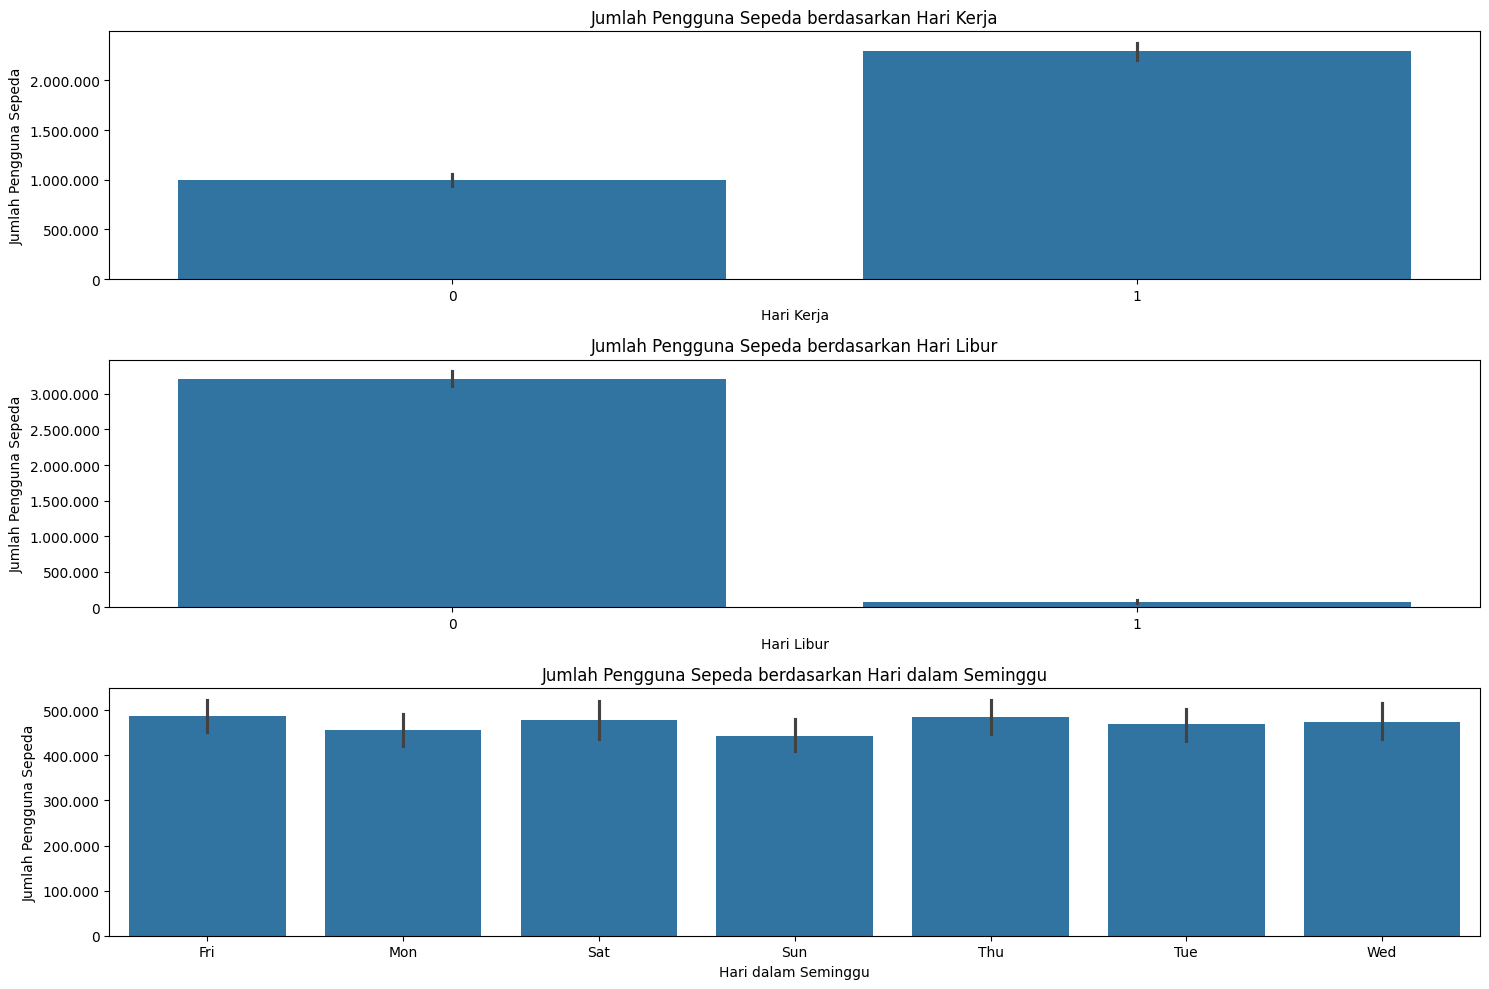

In [180]:
# Fungsi untuk format y-axis dengan ribuan separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    estimator=sum,
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')
axes[0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Berdasarkan holiday
sns.barplot(
    x='holiday',
    y='count',
    data=day_df,
    estimator=sum,
    ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')
axes[1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))


# Berdasarkan weekday
sns.barplot(
    x='weekday',
    y='count',
    data=day_df,
    estimator=sum,
    ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')
axes[2].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))


plt.tight_layout()
plt.show()

### Pertanyaan 5: Bagaimana tren penggunaan sepeda dalam setahun dari tahun 2011 - 2012

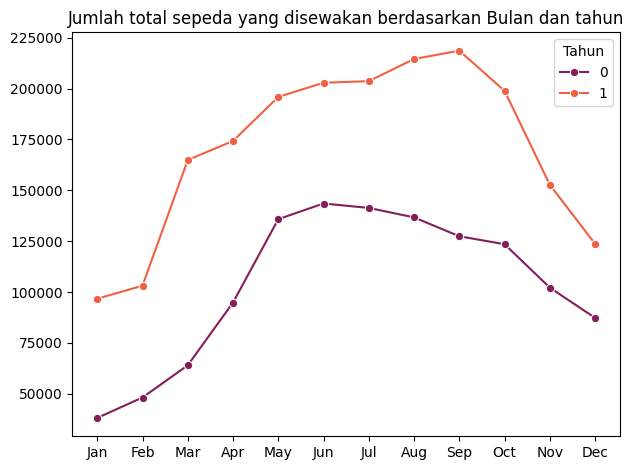

In [181]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"], observed=True).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 6: Bagaimana variabel seperti temp dan atemp dapat mempengaruhi jumlah total penggunaan sepeda ?

Text(0.5, 1.0, 'Feels Like Temperature vs Count')

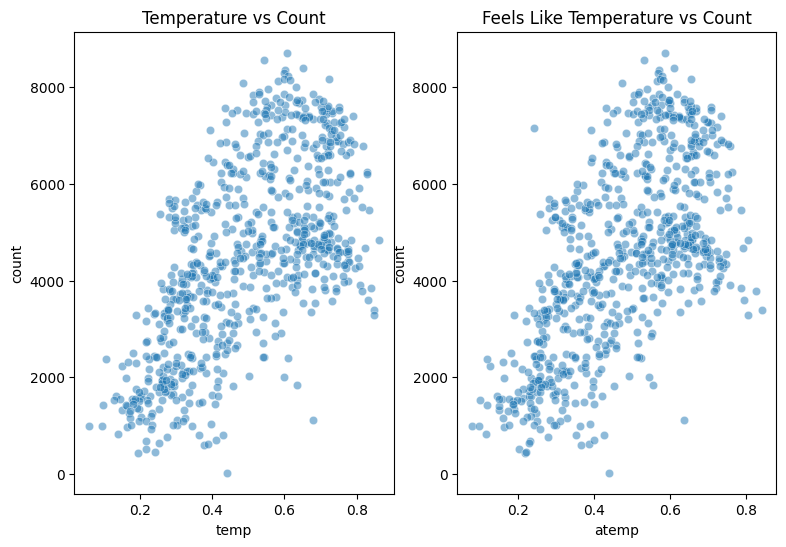

In [182]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')


### Pertanyaan 7: Apa saja faktor-faktor yang paling mempengaruhi jumlah total peminjaman sepeda?

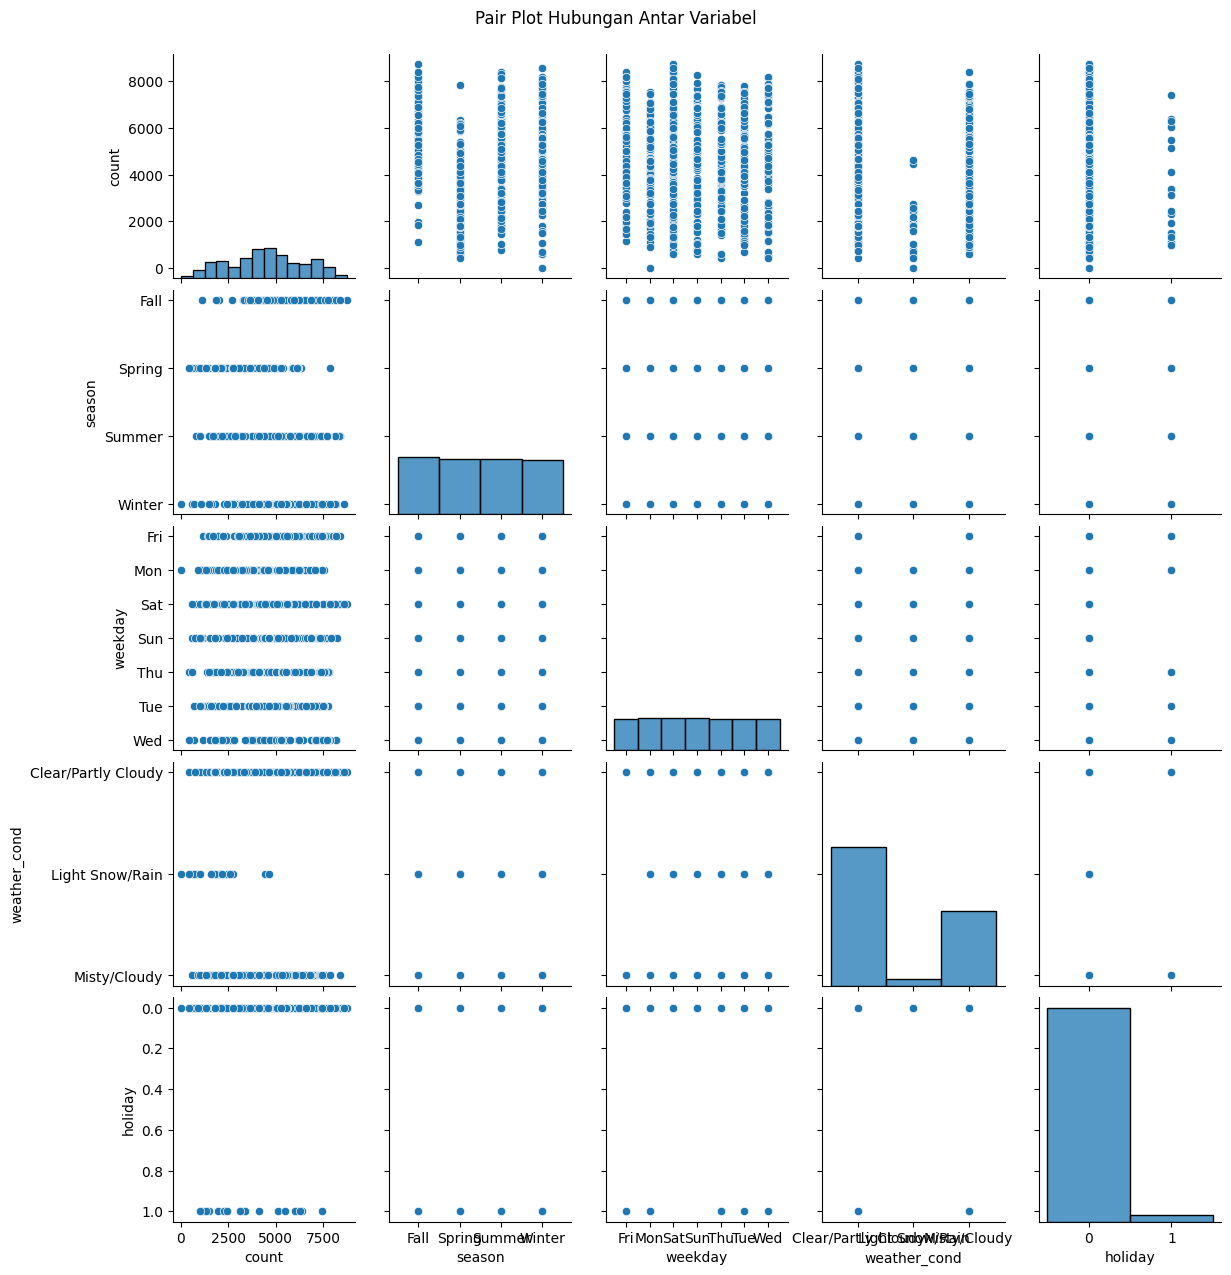

In [183]:
sns.pairplot(day_df, vars=['count', 'season', 'weekday', 'weather_cond','holiday'])
plt.suptitle('Pair Plot Hubungan Antar Variabel', y=1.02)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Kondisi cuaca  Cerah atau Sebagian Berawan (Clear/Partly Cloudy) adalah yang paling disukai oleh pengguna sepeda. Jumlah peminjaman sepeda mencapai angka tertinggi dalam kondisi cuaca yang cerah atau sebagian berawan. Cuaca berkabut atau mendung adalah kondisi cuaca kedua yang paling diminati oleh pengguna sepeda. Meskipun jumlah peminjaman tidak setinggi cuaca cerah, masih ada jumlah signifikan peminjaman sepeda pada kondisi cuaca ini.Kondisi cuaca ini adalah yang paling sedikit diminati oleh pengguna sepeda. Jumlah peminjaman sepeda menurun drastis ketika cuaca sedikit bersalju atau hujan.
  Dari hasil analisis dan visualisasi data, dapat disimpulkan bahwa:
        1. Cuaca yang mendukung: Pengguna sepeda cenderung meminjam sepeda lebih banyak saat cuaca cerah atau sedikit berawan karena kondisi tersebut memberikan kenyamanan dan keamanan.
        2. Cuaca yang kurang mendukung: Pengguna sepeda cenderung menghindari bersepeda saat kondisi cuaca berkabut, mendung, dan terutama saat hujan atau bersalju.
  
- Conclution pertanyaan 2 :
Dalam data tersebut memiliki 4 variabel yaitu Musim Gugur (Fall), Musim Semi (Spring), Musim Panas (Summer), Musim Dingin (Winter). berikut ini detail dari setiap musim

Musim Gugur (Fall):

1. Musim gugur memiliki jumlah penyewaan sepeda tertinggi di antara semua musim.
2. Pengguna terdaftar (Registered) mendominasi penggunaan sepeda di musim ini, menunjukkan bahwa banyak orang yang secara rutin menggunakan sepeda untuk  aktivitas sehari-hari.
3. Pengguna tidak terdaftar (Casual) juga menunjukkan angka penyewaan yang signifikan, menunjukkan bahwa musim gugur adalah musim yang populer untuk bersepeda rekreasi.

Musim Semi (Spring):

1. Musim semi memiliki jumlah penyewaan sepeda terendah di antara semua musim.
2. Pengguna registered masih mendominasi penyewaan, tetapi jumlahnya lebih rendah dibandingkan dengan musim lainnya.
3. Pengguna casual memiliki jumlah signifikan yang lebih kecil dari registered
   
Musim Panas (Summer):

1. Musim panas menunjukkan jumlah penyewaan sepeda yang tinggi, hampir setara dengan musim gugur.
2. Pengguna registered dan casual sama-sama aktif, walaupun pengguna registered lebih besar dari casual

Musim Dingin (Winter):

Musim dingin memiliki jumlah penyewaan sepeda yang cukup tinggi, hampir setara dengan musim panas.
Pengguna terdaftar tetap aktif meskipun kondisi cuaca kurang mendukung, menunjukkan komitmen mereka terhadap penggunaan sepeda.
Pengguna tidak terdaftar menurun dibandingkan dengan musim panas dan gugur, kemungkinan karena cuaca dingin dan kurang nyaman untuk bersepeda rekreasi.

- Conclution pertanyaan 3 : Pada visualisasi tersebut, terlihat adanya data penyewaan sepeda yang terbagi menjadi dua kategori: casual dan registered, selama periode 12 bulan. Data tersebut menunjukkan bahwa pengguna registered merupakan kelompok penyewa terbesar, dengan jumlah yang sangat mencolok dibandingkan dengan penyewa casual, seperti yang dapat dilihat dari visualisasi tersebut. Jumlah penyewaan terendah terjadi pada bulan Januari, sementara puncaknya terjadi pada bulan Agustus. Pada bulan tersebut, baik penyewaan casual maupun registered mencapai angka tertinggi, dengan penyewaan oleh pengguna registered melebihi 250 ribu.
  
- Conclution pertanyaan 4 :

  Visualisasi ini menunjukkan data dalam tiga kategori utama. Pertama, jumlah pengguna sepeda berdasarkan hari kerja (workingday). Meskipun perbedaannya tidak terlalu besar, hari kerja menunjukkan jumlah pengguna yang lebih tinggi dibandingkan dengan hari non-kerja (non-workingday), dengan kedua kategori memiliki lebih dari 4000 pengguna.

Kedua, berdasarkan status hari libur (holiday). Di sini, jumlah pengguna sepeda pada hari non-libur (non-holiday) secara signifikan lebih tinggi dibandingkan dengan hari libur (holiday). Hal ini mungkin menunjukkan bahwa pengguna lebih cenderung menyewa sepeda pada hari-hari biasa.

Ketiga, berdasarkan hari dalam seminggu (weekday). Data menunjukkan bahwa hari Jumat (Friday) memiliki jumlah pengguna tertinggi dengan rata-rata 4690.288 pengguna, sementara hari Minggu (Sunday) memiliki jumlah pengguna terendah dengan rata-rata 4228.829 pengguna.

- Conclution pertanyaan 5 :
  Berdasarkan visualisasi di atas, dapat disimpulkan bahwa tahun 2012, yang diwakili oleh angka 1, secara keseluruhan menunjukkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan tahun 2011. Tren ini terlihat konsisten dari Januari hingga Desember.

Pada tahun 2012, puncak penyewaan sepeda terjadi pada bulan September, sementara bulan dengan jumlah penyewaan terendah adalah Januari. Hal ini menunjukkan adanya peningkatan signifikan dalam jumlah penyewaan sepeda selama bulan-bulan musim panas, dengan puncak tertinggi di awal musim gugur.

Sebaliknya, pada tahun 2011, jumlah penyewaan sepeda mencapai puncaknya pada bulan Juni, dengan penurunan yang signifikan pada bulan Januari, yang merupakan bulan dengan penyewaan terendah. Data ini menunjukkan pola yang mirip dengan tahun 2012, di mana musim panas cenderung menjadi periode dengan aktivitas penyewaan sepeda yang lebih tinggi, meskipun tahun 2012 secara keseluruhan menunjukkan angka yang lebih tinggi.

- Conclution pertanyaan 6 :
Hubungan antara suhu (temp) dan jumlah penyewaan sepeda (count) menunjukkan adanya korelasi positif. Ini berarti bahwa ketika suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat.

Hubungan antara suhu yang dirasakan (atemp) dan jumlah penyewaan sepeda (count) juga menunjukkan korelasi positif. Dengan kata lain, saat suhu yang dirasakan meningkat, jumlah penyewaan sepeda cenderung mengalami peningkatan.

Dari kedua poin ini, dapat disimpulkan bahwa baik peningkatan suhu udara maupun suhu yang dirasakan berkaitan dengan peningkatan jumlah pengguna sepeda. Dengan kata lain, semakin tinggi suhu udara dan suhu yang dirasakan, semakin besar kecenderungan orang untuk menyewa sepeda. Hal ini menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menggunakan sepeda.
  
- Conclution pertanyaan 7 :
Berdasarkan visualisasi data yang telah ditampilkan, terdapat beberapa variabel yang paling berpengaruh terhadap jumlah peminjaman sepeda.

Pertama, dalam kolom "holiday," hari-hari yang bukan hari libur memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Hal ini ditunjukkan oleh diagram yang menampilkan perbedaan jumlah peminjaman yang sangat mencolok antara hari libur dan bukan hari libur.

Kedua, dalam kolom "weather_cond" atau kondisi cuaca, cuaca yang cerah atau setengah mendung (Clear/Partly Cloudy) menjadi kondisi yang paling diminati. Kondisi ini memiliki pengaruh yang lebih besar terhadap jumlah peminjaman sepeda dibandingkan dengan kondisi cuaca lainnya.

Sementara itu, variabel-variabel lain juga menunjukkan adanya pengaruh terhadap jumlah peminjaman sepeda, namun perbedaan yang ditimbulkan oleh variabel-variabel tersebut tidak terlalu signifikan dibandingkan dengan dua variabel yang disebutkan sebelumnya.